In [17]:
import matplotlib as mp
mp.use("pgf")
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes
import matplotlib.cm as cm
import numpy as np
import matplotlib2tikz as mp2tikz


[]

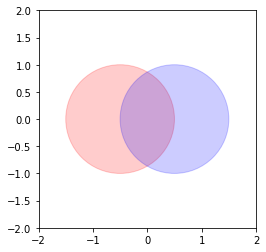

In [2]:
circle1 = plt.Circle((-.5,0), 1, color='r', alpha=.2)
circle2 = plt.Circle(( .5,0), 1, color='b', alpha=.2)

# add them to the plot (bad form to use ;, but saving space)
# and control the display a bit
ax = plt.gca()
ax.add_artist(circle1); ax.add_artist(circle2)
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')

# display it
plt.plot()

In [19]:
# globals
#colors=cm.OrRd(np.linspace(0.5, 1, 3))
colors=['red', 'green', 'blue']
cx=[-0.8,-0.2,.9]
cy=[-0.2,0.4,-0.4]


In [20]:
def plotPoints(cx, cy, colors):
    plt.scatter(cx, cy, color=colors)

def plotCirlcles(ax, cx, cy, colors):
    circle = [plt.Circle((cx[i],cy[i]), 1, color=colors[i], fill=False) for i in range(0,3)]
    for i in range(0,len(cx)):
        ax.add_artist(circle[i])

def plotInter(ax, cx, cy, colors):
    a = [sg.Point(cx[i],cy[i]).buffer(1.) for i in range(0,3)]
    inter = a[0].intersection(a[1])
    for i in range(1, len(cx)):
        inter = inter.intersection(a[2])
    ax.add_patch(descartes.PolygonPatch(inter, fc='r', ec='k', alpha=0.2))

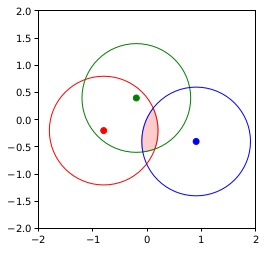

In [21]:
ax = plt.gca()

#plot settings
#plt.axis('off')
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')


plotPoints(cx, cy, colors)
plotCirlcles(ax, cx, cy, colors)
plotInter(ax, cx, cy, colors)

ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')

plt.savefig("a.pdf")
mp2tikz.save("a.tex")
#plt.show()

In [17]:
type(m2)

shapely.geometry.polygon.Polygon